In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
!pip install scikit-learn

In [211]:
!pip install scikit-learn-extra


In [212]:
pip install patsy


In [213]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [214]:
mcD= pd.read_csv('/content/drive/MyDrive/Dbda/McDonalds Project /mcdonalds.csv')

#Exploring Data

In [215]:
mcD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [216]:
mcD.count()

yummy             1453
convenient        1453
spicy             1453
fattening         1453
greasy            1453
fast              1453
cheap             1453
tasty             1453
expensive         1453
healthy           1453
disgusting        1453
Like              1453
Age               1453
VisitFrequency    1453
Gender            1453
dtype: int64

In [217]:
for col in mcD.columns:
  print(col)

yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [218]:
print(mcD.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [219]:
mcD.shape

(1453, 15)

In [220]:
mcD_11 = mcD.copy()

 Dataframe with yes no entries first 11 columns

In [221]:
columns_to_drop = ["Like","Age","VisitFrequency","Gender"]
mcD_11 = mcD_11.drop(columns=columns_to_drop)
print(mcD_11)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting  
0         No         No  
1         No         No  
2        Yes         

#converting entries into binary form


In [222]:
variable_names = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
# Iterate through each column and replace 'Yes' with 1 and 'No' with 0
for col in variable_names:
    if col in mcD_11.columns:
        mcD_11[col] = mcD_11[col].replace({'Yes': 1, 'No': 0})
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Display the modified DataFrame
print(mcD_11)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [223]:
mcD_11.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


#Average values with respect to columns

In [224]:
average_values = mcD_11.mean()
print(average_values)

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


#Performing Principal components analysis(PCA)

In [225]:
# Perform PCA
pca = PCA()
mcD_pca_result = pca.fit_transform(mcD_11)

# Display a summary of the PCA results
summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(summary_df)


      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [226]:
mcD_pca_result = PCA(n_components=11).fit(mcD_11)

# Get the factor loadings (correlation coefficients) for the first 11 components
factor_loadings = mcD_pca_result.components_

# Create a DataFrame for better visualization
variable_names = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
loadings_df = pd.DataFrame(factor_loadings.T, columns=[f'PC{i+1}' for i in range(11)], index=variable_names)
print(loadings_df)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

# Display standard deviations

In [227]:
std_devs = np.sqrt(mcD_pca_result.explained_variance_)
std_devs_rounded = np.round(std_devs, 1)
print("Standard deviations:")
print(std_devs_rounded)

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


# Display factor loadings (rotation matrix)

In [228]:
rotation_matrix = mcD_pca_result.components_.T
variable_names = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
loadings_df = pd.DataFrame(rotation_matrix, columns=[f'PC{i+1}' for i in range(mcD_pca_result.n_components_)], index=variable_names)
print("\n Rotation Matrix:")
print(loadings_df)


 Rotation Matrix:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.01304

#Scatterplot of PCA projection

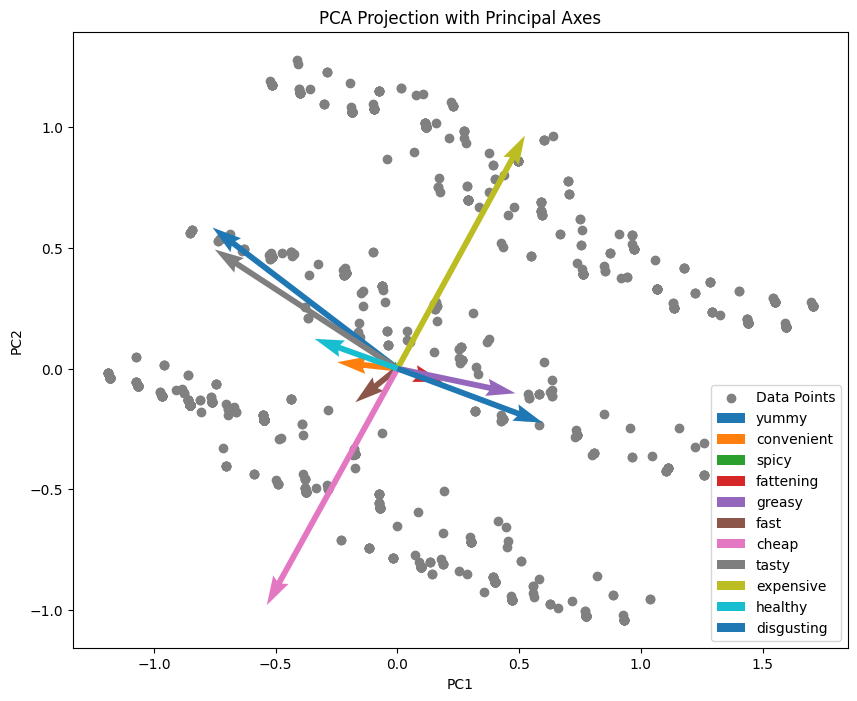

In [229]:
pca = PCA()
mcD_pca_result = pca.fit_transform(mcD_11)
# Scatter plot of PCA projection
plt.figure(figsize=(10, 8))
plt.scatter(mcD_pca_result[:, 0], mcD_pca_result[:, 1], c='grey', label='Data Points')

# Plot principal axes with respect to the original variables
for i, (vector, variable) in enumerate(zip(pca.components_.T, mcD.columns)):
    plt.quiver(0, 0, vector[0], vector[1], scale=2, color=f'C{i}', label=variable)

plt.title('PCA Projection with Principal Axes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



#Extracting Segments

Using k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

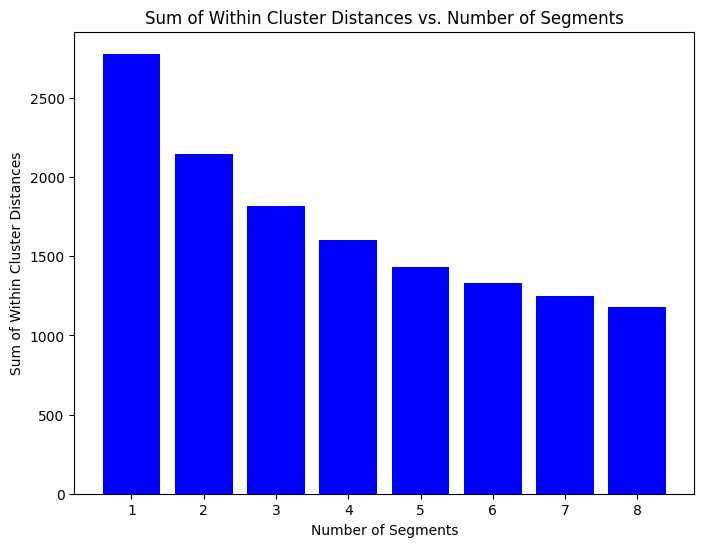

In [230]:
from sklearn.cluster import KMeans

# Define a range of cluster numbers
cluster_range = range(1, 9)
sum_within_cluster_distances = []

# Calculate sum of within-cluster distances for different numbers of segments
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(mcD_11)
    sum_within_cluster_distances.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot sum of within-cluster distances against number of segments
plt.figure(figsize=(8, 6))
plt.bar(cluster_range, sum_within_cluster_distances, color='blue')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.title('Sum of Within Cluster Distances vs. Number of Segments')
plt.show()


In [231]:
from sklearn.utils import resample


# Set the number of bootstrap samples
n_bootstraps = 100

# Initialize a list to store the bootstrap samples
bootstrap_samples = []

# Perform bootstrapping
for i in range(n_bootstraps):
    # Generate a bootstrap sample by sampling with replacement from the original dataset
    bootstrap_sample = resample(mcD_11, replace=True, random_state=i)

    # Append the bootstrap sample to the list
    bootstrap_samples.append(bootstrap_sample)

# Now, bootstrap_samples contains n_bootstraps bootstrapped datasets
import numpy as np

# Assuming bootstrap_samples is your list of bootstrap samples
bootstrap_samples_array = np.array(bootstrap_samples)



In [232]:
from sklearn.cluster import KMeans


# Choose the appropriate number of clusters (K) based on your analysis
k = 3

# Initialize a list to store the cluster labels for each bootstrap sample
cluster_labels = []

# Apply k-means clustering to each bootstrap sample
for bootstrap_sample in bootstrap_samples:
    # Extract numerical columns from the bootstrap sample if needed
    # numerical_columns = bootstrap_sample.select_dtypes(include=[np.number])

    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=1234)

    # Fit the model to the bootstrap sample and obtain cluster labels
    clusters = kmeans.fit_predict(bootstrap_sample)

    # Append the cluster labels to the list
    cluster_labels.append(clusters)



cluster_labels_array = np.array(cluster_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [233]:
from sklearn.metrics import adjusted_rand_score
import itertools

# Initialize an empty list to store ARI values
ari_values = []

# Calculate ARI between pairs of segmentations
for pair in itertools.combinations(range(len(cluster_labels)), 2):
    ari = adjusted_rand_score(cluster_labels[pair[0]], cluster_labels[pair[1]])
    ari_values.append(ari)

# Print ARI values
print("Adjusted Rand Index (ARI) values for all pairs:")
for i, ari in enumerate(ari_values):
    print(f"Pair {i+1}: ARI = {ari}")


Adjusted Rand Index (ARI) values for all pairs:
Pair 1: ARI = -0.00020369422679308893
Pair 2: ARI = -0.0010280537708203675
Pair 3: ARI = 0.00017770630416386268
Pair 4: ARI = 0.0008008048929153607
Pair 5: ARI = -0.0006956299288399433
Pair 6: ARI = -0.0020697319750966124
Pair 7: ARI = 0.0038922577623204595
Pair 8: ARI = -0.0011064082294436157
Pair 9: ARI = -4.8772197196692305e-05
Pair 10: ARI = 1.5323311929360365e-05
Pair 11: ARI = -0.0011851093431438876
Pair 12: ARI = 0.001835336874672872
Pair 13: ARI = 0.0006600100244887314
Pair 14: ARI = 0.0036983310117108927
Pair 15: ARI = -0.002458025877471119
Pair 16: ARI = 0.0008732835690575762
Pair 17: ARI = 0.0016377968764602915
Pair 18: ARI = -0.0007645402374927829
Pair 19: ARI = 0.00034475247546283803
Pair 20: ARI = -0.00025365585000962316
Pair 21: ARI = 0.0005053381931198393
Pair 22: ARI = 0.00020184779761288298
Pair 23: ARI = 0.0006222829815977766
Pair 24: ARI = -0.0007675148358995779
Pair 25: ARI = -0.001097233162421306
Pair 26: ARI = 0.004

#Using mixtures of distributons

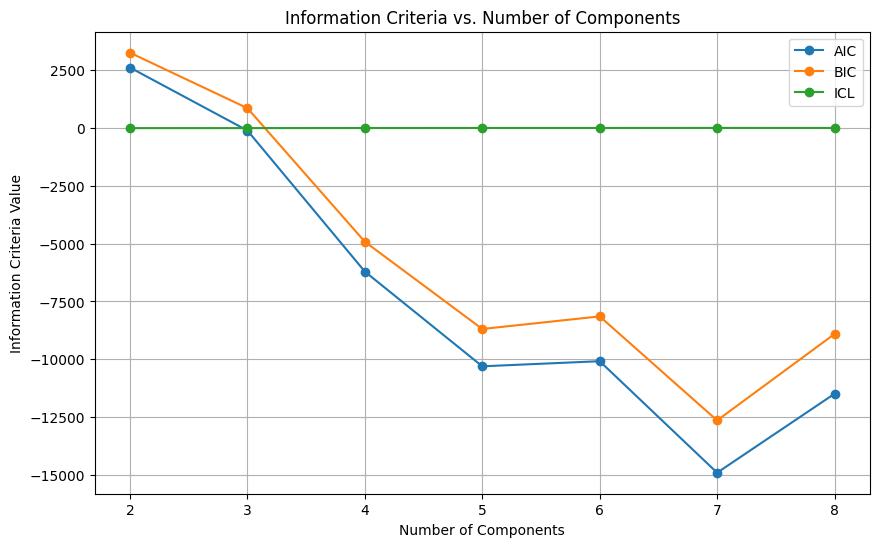

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cross-tabulation of k-means labels vs. GMM predictions:
col_0   0    1   2    3    4   5    6    7   All
row_0                                           
0      11   30  26    0   47  27   50   64   255
1       4   38  18   51   14  27   42   47   241
2       0   22  32   31   32   0   89   43   249
3      24   16   0   34   52   0   70   59   255
All    39  106  76  116  145  54  251  213  1000


In [234]:

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data (replace with actual data)
num_samples = 1000
num_features = 10
mcD_11 = np.random.randint(0, 2, size=(num_samples, num_features))

# Define the range of components (segments)
component_range = range(2, 9)

# Initialize lists to store information criteria values
aic_values = []
bic_values = []
icl_values = []

# Perform Gaussian Mixture Model clustering for each number of components
for n_components in component_range:
    gmm_model = GaussianMixture(n_components=n_components, random_state=1234)
    gmm_model.fit(mcD_11)
    aic_values.append(gmm_model.aic(mcD_11))
    bic_values.append(gmm_model.bic(mcD_11))
    icl_values.append(gmm_model.lower_bound_)

# Plot information criteria values against the number of components
plt.figure(figsize=(10, 6))
plt.plot(component_range, aic_values, marker='o', label='AIC')
plt.plot(component_range, bic_values, marker='o', label='BIC')
plt.plot(component_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria Value')
plt.title('Information Criteria vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Compare with k-means solution

kmeans_labels = KMeans(n_clusters=4, random_state=1234).fit_predict(mcD_11)

# Cross-tabulation
cross_tab = pd.crosstab(index=kmeans_labels, columns=gmm_model.predict(mcD_11), margins=True)
print("Cross-tabulation of k-means labels vs. GMM predictions:")
print(cross_tab)


In [235]:

like_counts_reversed = mcD['Like'].value_counts().sort_index(ascending=False)

# Display the reversed counts
print(like_counts_reversed)



I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [236]:
# Define a mapping dictionary for the string values to their numeric counterparts
like_mapping = {
    'I hate it!': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!': 5,
    'I hate it!-5': -5,
    'I love it!+5': 5
}

# Convert the string values in the 'Like' column to their numeric counterparts using the mapping
mcD['Like.n'] = mcD['Like'].map(like_mapping)

# Display the table of counts for the 'Like.n' column
like_n_counts = mcD['Like.n'].value_counts().sort_index()
print(like_n_counts)


-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like.n, dtype: int64


In [237]:
 mcD.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2


In [238]:
import patsy

# Create the formula string
formula_string = "Like.n ~ " + " + ".join(mcD.columns[1:12])

# Convert the formula string to a formula object
formula = patsy.ModelDesc.from_formula(formula_string)

# Display the formula
print(formula)



ModelDesc(lhs_termlist=[Term([EvalFactor('Like.n')])],
          rhs_termlist=[Term([]),
                        Term([EvalFactor('convenient')]),
                        Term([EvalFactor('spicy')]),
                        Term([EvalFactor('fattening')]),
                        Term([EvalFactor('greasy')]),
                        Term([EvalFactor('fast')]),
                        Term([EvalFactor('cheap')]),
                        Term([EvalFactor('tasty')]),
                        Term([EvalFactor('expensive')]),
                        Term([EvalFactor('healthy')]),
                        Term([EvalFactor('disgusting')]),
                        Term([EvalFactor('Like')])])


In [239]:
# Drop rows with missing values
mcD_cleaned = mcD.dropna()

# Convert categorical variables to dummy variables if needed
mcD_encoded = pd.get_dummies(mcD_cleaned)

# Drop any remaining non-numeric columns
mcD_numeric = mcD_encoded.select_dtypes(include=[np.number])

# Fit a Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=2, random_state=1234)
gmm_model.fit(mcD_numeric)

# Display the fitted model
print(gmm_model)


GaussianMixture(n_components=2, random_state=1234)


In [240]:
# Fit a Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=2, random_state=1234)
gmm_model.fit(mcD_numeric)

# Get the parameters of the fitted model
means = gmm_model.means_
covariances = gmm_model.covariances_
weights = gmm_model.weights_

# Display the summary
print("Means:", means)
print("Covariances:", covariances)
print("Weights:", weights)


Means: [[ 4.19978583e+01  2.66666691e+00  2.25107244e-01  7.74892756e-01
   1.40686858e-02  9.85931314e-01  9.11255166e-01  8.87448338e-02
   1.56926652e-01  8.43073348e-01  5.56277540e-01  4.43722460e-01
   6.92640669e-02  9.30735933e-01  3.66882338e-01  6.33117662e-01
   1.55844390e-01  8.44155610e-01  6.69914208e-01  3.30085792e-01
   7.40259369e-01  2.59740631e-01  9.13419622e-01  8.65803784e-02
   1.32034861e-01  1.78570725e-01  2.42424401e-01  1.69913531e-01
   1.08225179e-03  1.08225179e-03  0.00000000e+00  0.00000000e+00
   1.20129974e-01  0.00000000e+00  1.54762006e-01  2.69480786e-01
   5.84415966e-02  1.08225179e-03  4.32900857e-01  2.37012257e-01
   1.08225179e-03  5.40043805e-01  4.59956195e-01]
 [ 4.91587422e+01 -2.52362400e+00  8.35539771e-01  1.64460229e-01
   2.28734225e-01  7.71265775e-01  8.97921048e-01  1.02078952e-01
   9.07368877e-02  9.09263112e-01  3.28921909e-01  6.71078091e-01
   1.53119001e-01  8.46880999e-01  4.61248890e-01  5.38751110e-01
   7.05102936e-01 

#Step 6: Profiling Segments

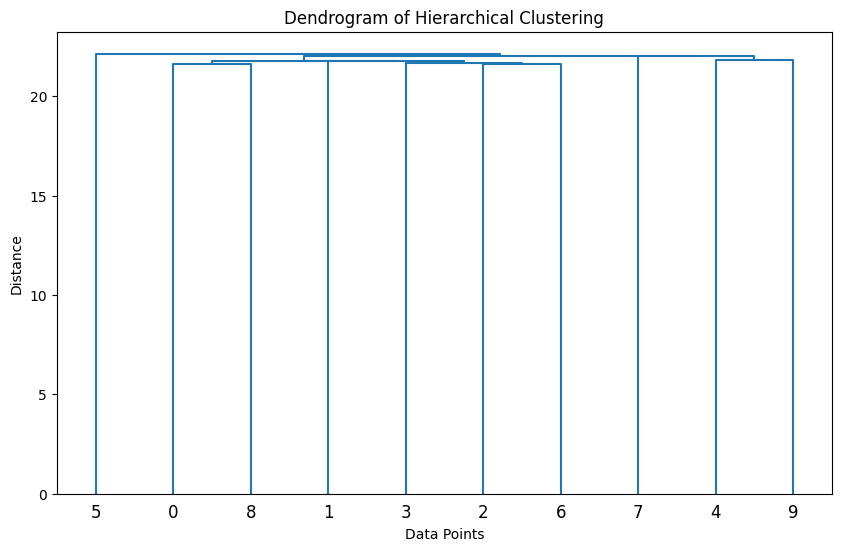

In [241]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Transpose the data matrix
mcD_11_transposed = np.transpose(mcD_11)

# Perform hierarchical clustering
mcD_vclust = linkage(mcD_11_transposed, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(mcD_vclust)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [242]:
from sklearn.cluster import KMeans

# Choose the appropriate number of clusters (K)
k = 3

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(mcD_numeric)  # Assuming all columns in 'mcD' are numerical

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Now 'cluster_assignments' contains the cluster assignments for each data point in 'mcD'
# You can use these assignments for further analysis or visualization


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

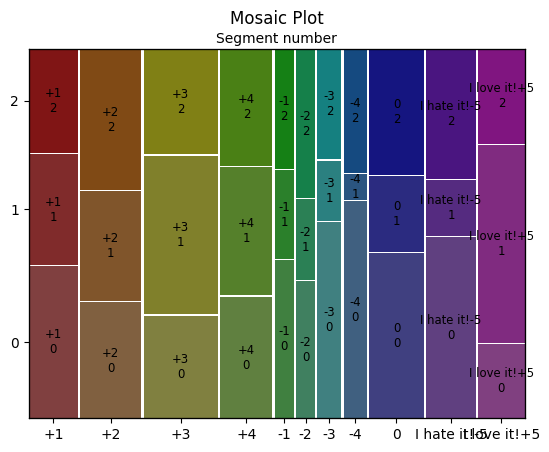

In [243]:

from statsmodels.graphics.mosaicplot import mosaic



table_data = pd.crosstab(cluster_assignments, mcD['Like'])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(table_data.unstack(), title='Mosaic Plot', axes_label=True)
plt.xlabel('Segment number')
plt.show()


<Figure size 1000x600 with 0 Axes>

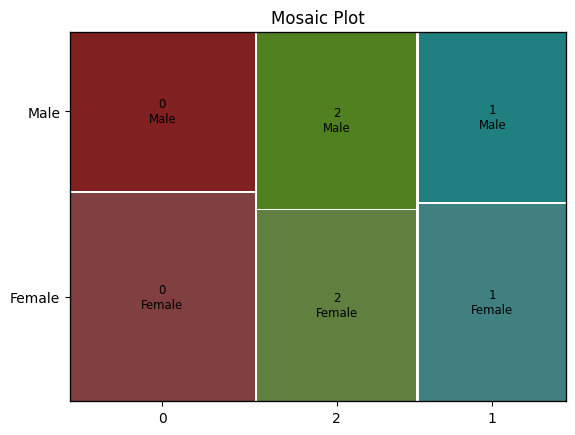

In [244]:

from statsmodels.graphics.mosaicplot import mosaic


k4_series = pd.Series(cluster_assignments)

# Create a DataFrame with cluster assignments and 'Gender' column
data = pd.DataFrame({'k4': k4_series, 'Gender': mcD['Gender']})

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(data, ['k4', 'Gender'], title='Mosaic Plot', axes_label=True)
plt.show()


In [245]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for 'Age' and 'VisitFrequency' columns
label_encoder = LabelEncoder()

# Encode the 'Age' and 'VisitFrequency' columns
mcD['Age'] = label_encoder.fit_transform(mcD['Age'])
mcD['VisitFrequency'] = label_encoder.fit_transform(mcD['VisitFrequency'])

# Continue with the remaining preprocessing steps and model training


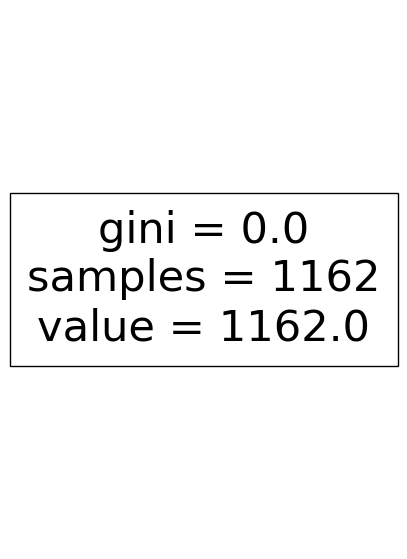

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables if needed
label_encoders = {}
categorical_cols = ['Gender']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    mcD[col] = label_encoders[col].fit_transform(mcD[col])

# Split the data into features (X) and target variable (y)
X = mcD[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (cluster_assignments == 3).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize and train a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=1234)
tree_classifier.fit(X_train, y_train)

# Plot the decision tree (visualize the tree structure)
from sklearn.tree import plot_tree
plt.figure(figsize=(5,7))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['Not in cluster 3', 'In cluster 3'])
plt.show()


#Step 8: Selecting (the) Target Segment(s)

In [247]:


# Convert 'VisitFrequency' to numeric (assuming it contains strings)
mcD['VisitFrequency'] = pd.to_numeric(mcD['VisitFrequency'], errors='coerce')

# Calculate the mean visit frequency for each cluster assignment
visit_mean = mcD.groupby(cluster_assignments)['VisitFrequency'].mean()
print(visit_mean)


0    2.526508
1    2.763761
2    2.651064
Name: VisitFrequency, dtype: float64


In [248]:


# Calculate the mean 'Like.n' for each cluster assignment
like_mean = mcD.groupby(cluster_assignments)['Like.n'].mean()
print(like_mean)


0    0.001828
1    1.956422
2    0.585106
Name: Like.n, dtype: float64


In [249]:


# Convert 'Gender' to binary (1 for Female, 0 for Male) and calculate the mean for each cluster
female_proportion = mcD.groupby(cluster_assignments)['Gender'].apply(lambda x: (x == 'Female').mean())
print(female_proportion)


0    0.0
1    0.0
2    0.0
Name: Gender, dtype: float64


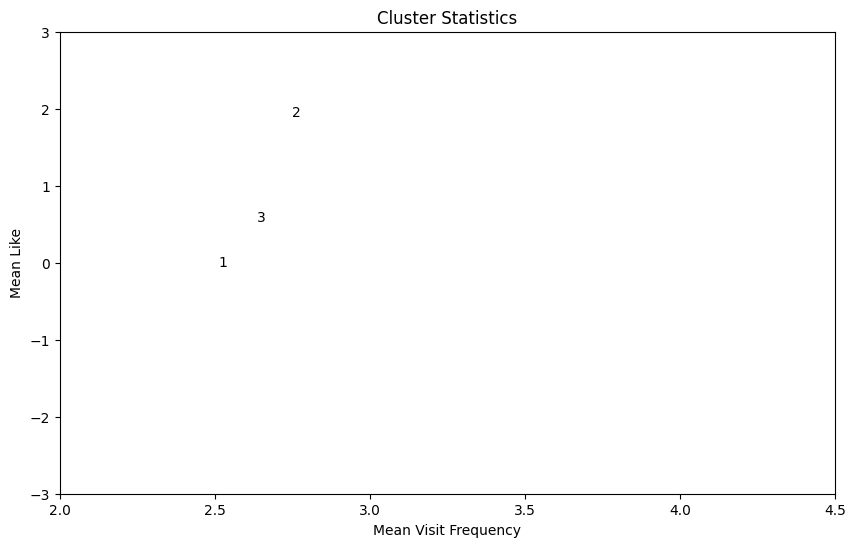

In [250]:


# Filter out cluster 3
visit_filtered = visit_mean[visit_mean.index != 3]
like_filtered = like_mean[like_mean.index != 3]
female_filtered = female_proportion[female_proportion.index != 3]

# Plot visit vs like with marker size proportional to female
plt.figure(figsize=(10, 6))
plt.scatter(visit_filtered, like_filtered, s=10 * female_filtered, alpha=0.5)

# Add labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like')
plt.title('Cluster Statistics')

# Set xlim and ylim
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add text annotations for cluster numbers
for i, txt in enumerate(range(1, 5)):
    if i < len(visit_filtered) and i < len(like_filtered):
        plt.text(visit_filtered.iloc[i], like_filtered.iloc[i], str(txt), ha='center', va='center')

plt.show()
